In [2]:
#Group Members:
    # 21ucs030 : Arpit Gupta
    # 21ucs031 : Arpit Jain
    # 21ucs073 : Divyansh Garg
    # 21ucs077 : Elishben Manojbhai Baraiya

pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=254d32c6ff0ac96448ea38f23bb2db9e290e7834f865de256c322a56c3ddeadf
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


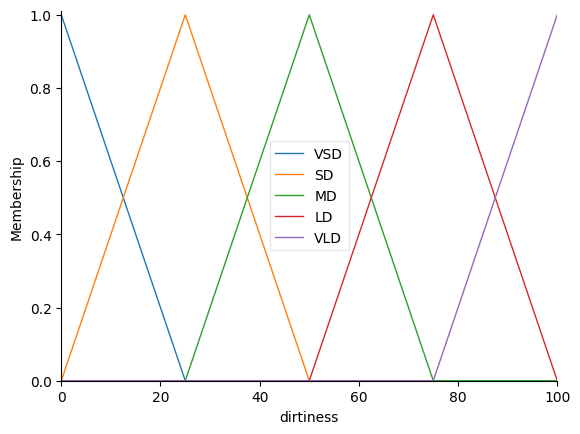

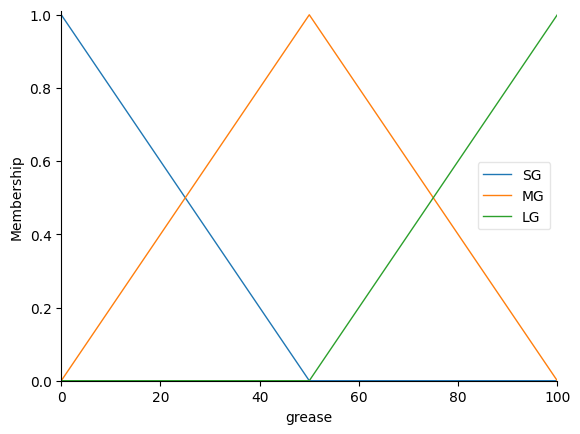

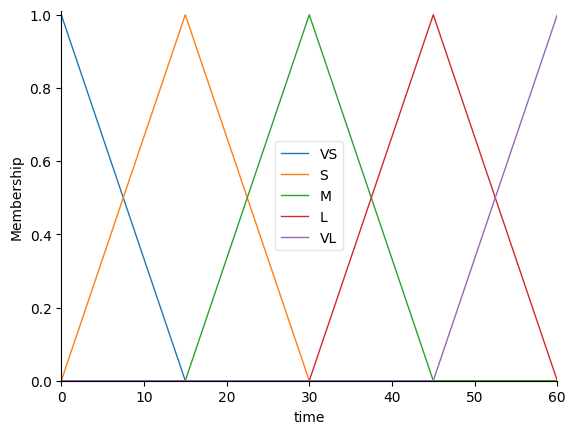

In [11]:
# Linguistic variables for antecedents/consequent
dirtiness = ctrl.Antecedent(np.arange(0, 101, 1), 'dirtiness')
grease = ctrl.Antecedent(np.arange(0, 101, 1), 'grease')
time = ctrl.Consequent(np.arange(0, 61, 1), 'time')

# membership functions for each linguistic values
dirtiness.automf(5, names=['VSD','SD', 'MD', 'LD','VLD'])
grease.automf(3, names=['SG', 'MG', 'LG'])
time.automf(5, names=['VS', 'S', 'M', 'L', 'VL'])

dirtiness.view()
grease.view()
time.view()

In [12]:
# Define the rules
rule1 = ctrl.Rule(dirtiness['VSD'] & grease['SG'], time['VS'])
rule2 = ctrl.Rule(dirtiness['VSD'] & grease['MG'], time['S'])
rule3 = ctrl.Rule(dirtiness['VSD'] & grease['LG'], time['M'])
rule4 = ctrl.Rule(dirtiness['SD'] & grease['SG'], time['VS'])
rule5 = ctrl.Rule(dirtiness['SD'] & grease['MG'], time['M'])
rule6 = ctrl.Rule(dirtiness['SD'] & grease['LG'], time['L'])
rule7 = ctrl.Rule(dirtiness['MD'] & grease['SG'], time['S'])
rule8 = ctrl.Rule(dirtiness['MD'] & grease['MG'], time['M'])
rule9 = ctrl.Rule(dirtiness['MD'] & grease['LG'], time['L'])
rule10 = ctrl.Rule(dirtiness['LD'] & grease['SG'], time['M'])
rule11 = ctrl.Rule(dirtiness['LD'] & grease['MG'], time['L'])
rule12 = ctrl.Rule(dirtiness['LD'] & grease['LG'], time['VL'])
rule13 = ctrl.Rule(dirtiness['VLD'] & grease['SG'], time['M'])
rule14 = ctrl.Rule(dirtiness['VLD'] & grease['MG'], time['L'])
rule15 = ctrl.Rule(dirtiness['VLD'] & grease['LG'], time['VL'])

# Create the control system and its simulation
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
ctrl_sim = ctrl.ControlSystemSimulation(ctrl_sys)


Washing time: 28.170731707317092


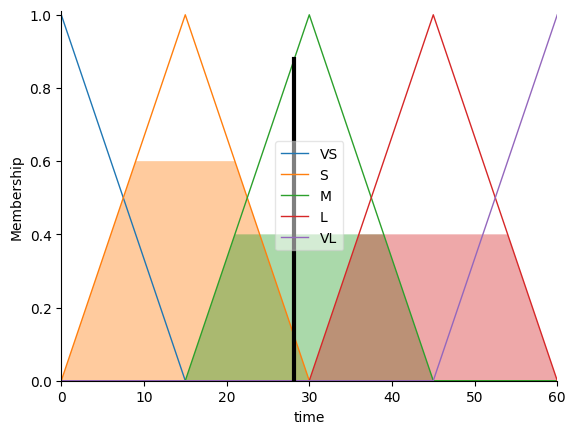

In [15]:
# Pass inputs to the ControlSystem
ctrl_sim.inputs({'dirtiness': 60, 'grease': 20})

# Crunch the numbers
ctrl_sim.compute()
print("Washing time:", ctrl_sim.output['time'])
time.view(sim=ctrl_sim)
